# Pandas

Pandas is an open-source data analysis and manipulation library for Python, built on top of NumPy.
It provides data structures and functions needed to work with structured data (e.g. tables, Excel, CSV, SQL).

### 🔹 Why Pandas?

Handles tabular (rows & columns) and time-series data easily.

Provides fast, flexible, and expressive data manipulation.

Integrates well with NumPy, Matplotlib, and Scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Pandas Data Structures

Pandas has two main data structures:

| Structure |    Description   |       Analogy      |
|:---------:|:----------------:|:------------------:|
| Series    | 1D labeled array | Column in Excel    |
| DataFrame | 2D labeled data  | Entire Excel Sheet |



##### Series
A Series is a one-dimensional array-like object that can hold data of any type (integers, strings, floats, etc.) and has an index.


In [ ]:
# Create Series from a list
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(s)

# Access elements
print(s['b'])  # 20

# Operations
print(s + 10)  # Adds 10 to each element

##### DataFrame
A DataFrame is a 2D labeled data structure with columns of potentially different types (similar to SQL table or Excel spreadsheet).

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 28],
    'Salary': [50000, 60000, 70000, 80000, 55000],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', 'HR'],
    'City': ['New York', 'London', 'Paris', 'Berlin', 'Tokyo']
}

In [ ]:
df = pd.DataFrame(data)
print(df)

In [ ]:
# Access columns
print(df['Name'])

#### Accessing Data using iloc and loc

| Operation | Uses                       | Example                       |
| --------- | -------------------------- | ----------------------------- |
| `iloc`    | Index positions            | `df.iloc[1, 2] → 60000`       |
| `loc`     | Labels (names, conditions) | `df.loc[1, 'Salary'] → 60000` |


🔹 iloc → integer-location based indexing

You use row and column positions (indices).

Access rows and columns by their integer position (like in NumPy arrays).

df.iloc[row_selection, column_selection]
- row_selection: integer(s) or slice for row positions
- column_selection: integer(s) or slice for column positions


In [ ]:
# Single element (row, column)
df.iloc[1, 2]     # Row 1, Column 2 -> Bob’s Salary
# Output: 60000

In [ ]:
# Entire row
df.iloc[2]
# Output: all data for Charlie

In [ ]:
# Multiple rows
df.iloc[[0, 3, 4]]
# Returns rows 0, 3, and 4

In [ ]:
# Range of rows
df.iloc[1:4]
# Returns rows 1, 2, 3 (upper bound excluded)

In [ ]:
# Specific rows and specific columns
df.iloc[[0, 2], [1, 3]]
# Rows 0 & 2, Columns 1 (Age) and 3 (Department)

In [ ]:
# All rows, subset of columns
df.iloc[:, [0, 2]]
# Name and Salary columns for all rows

In [ ]:
# Using slices for both
df.iloc[1:4, 0:3]
# Rows 1–3, Columns 0–2

In [ ]:
# Negative indexing
df.iloc[-1]       # Last row (Eve)
df.iloc[:, -2:]   # Last two columns (Department, City)

In [ ]:
# Conditional logic with positions (You can’t pass conditions directly; you must use .iloc after finding positions)
df.iloc[(df['Age'] > 30).values]
# Rows where Age > 30

🔹 loc → label-based indexing

You use row labels and column names.

Access rows and columns by their labels (index names and column names).

df.loc[row_labels, column_labels]
- row_labels: row index labels, list, slice, or boolean condition
- column_labels: column names or list of column names


In [ ]:
# Single row by label
df.loc[0]
# Row labeled 0 (Alice)

In [ ]:
# Multiple rows by label
df.loc[[0, 3]]
# Rows 0 (Alice) and 3 (David)

In [ ]:
# Range of labels (inclusive)
df.loc[1:3]
# Rows 1, 2, and 3 (note: inclusive in loc)

In [ ]:
# Specific columns
df.loc[:, ['Name', 'City']]
# All rows, only Name and City

In [ ]:
# Specific rows & columns
df.loc[[1, 4], ['Name', 'Salary']]
# Rows 1 and 4, only Name and Salary

In [ ]:
# Conditional row selection
df.loc[df['Age'] > 30]
# Rows where Age > 30

In [ ]:
# Conditional + column subset
df.loc[df['Salary'] > 60000, ['Name', 'Salary']]
# Rows with Salary > 60000, show only those two columns


In [ ]:
# Assigning values
df.loc[df['Department'] == 'HR', 'Bonus'] = 5000
# Adds new column 'Bonus' with 5000 for HR employees


In [ ]:
# Label-based range (if custom index)
df2 = df.set_index('Name')
df2.loc['Bob':'David', ['Age', 'Salary']]
# Rows from Bob → David, columns Age and Salary


In [ ]:
# Boolean list
df.loc[[True, False, True, False, True], ['Name', 'City']]
# Selects 1st, 3rd, 5th rows with Name, City


| Feature                        | `iloc`                          | `loc`                           |
| ------------------------------ | ------------------------------- | ------------------------------- |
| Access by                      | Integer position                | Label (index/column names)      |
| Row range                      | Excludes end (`1:3` → rows 1–2) | Includes end (`1:3` → rows 1–3) |
| Can use conditions             | ❌ (indirect only)               | ✅ Yes                           |
| Can use boolean masks          | ✅                               | ✅                               |
| Can assign values              | ✅                               | ✅                               |
| Works with custom index labels | ❌                               | ✅                               |


when to use iloc and loc

| Situation                         | Use    |
| --------------------------------- | ------ |
| You know **row/column positions** | `iloc` |
| You know **labels or conditions** | `loc`  |
| You have **custom indexes**       | `loc`  |
| You want **boolean filtering**    | `loc`  |


##### Data Input

| File Type  | Function           | Example                           |
| ---------- | ------------------ | --------------------------------- |
| CSV / TSV  | `read_csv()`       | `pd.read_csv('data.csv')`         |
| Excel      | `read_excel()`     | `pd.read_excel('data.xlsx')`      |
| JSON       | `read_json()`      | `pd.read_json('data.json')`       |
| HTML Table | `read_html()`      | `pd.read_html('page.html')`       |
| SQL        | `read_sql()`       | `pd.read_sql(query, connection)`  |
| Parquet    | `read_parquet()`   | `pd.read_parquet('data.parquet')` |
| Pickle     | `read_pickle()`    | `pd.read_pickle('data.pkl')`      |
| ORC        | `read_orc()`       | `pd.read_orc('data.orc')`         |
| Clipboard  | `read_clipboard()` | `pd.read_clipboard()`             |



In [ ]:
# Basic CSV
df = pd.read_csv('./data_samp.csv')

# Custom delimiter (sep or delimiter)
# Read CSV with seprator (if by defualt csv have comma ',' as separator/delimintor  no need to pass sep as argument)
df = pd.read_csv("/Users/nisarggurjar/Desktop/Batch0811/data_samp.csv", sep = '|')
#delimiter is just an alias (alternative name) for sep.
df = pd.read_csv("/Users/nisarggurjar/Desktop/Batch0811/data_samp.csv", delimiter='|')

# File without headers
df = pd.read_csv('no_header.csv', header=None)

# Custom column names
df = pd.read_csv('no_header.csv', names=['Name', 'Age', 'Salary'])

# Skip rows and limit reading
df = pd.read_csv('data.csv', skiprows=2, nrows=5)

# Read specific columns only
df = pd.read_csv('data.csv', usecols=['Name', 'Salary'])

# Missing value handling
df = pd.read_csv('data.csv', na_values=['NA', 'Missing'])

# Encoding issues
df = pd.read_csv('data.csv', encoding='latin1')

# Compressed files
df = pd.read_csv('data.csv.gz', compression='gzip')

# Large files (chunk reading)
for chunk in pd.read_csv('big_file.csv', chunksize=1000):
    print(chunk.shape)

# Excel Files (pd.read_excel)
df = pd.read_excel('employees.xlsx')

# Select Specific Sheet
df = pd.read_excel('employees.xlsx', sheet_name='HR')

# Read multiple sheets at once
sheets = pd.read_excel('employees.xlsx', sheet_name=None)
# returns dict of {sheet_name: DataFrame}

# Skip rows, specify columns
df = pd.read_excel('employees.xlsx', skiprows=2, usecols='A:C')

# JSON Files (pd.read_json)
df = pd.read_json('data.json')

# JSON from string or URL
import json

json_str = '{"Name": ["Alice", "Bob"], "Age": [25, 30]}'
df = pd.read_json(json_str)

# Nested JSON (record format)
df = pd.read_json('data_nested.json', orient='records')

# HTML Table (pd.read_html)
url = 'https://www.w3schools.com/html/html_tables.asp'
tables = pd.read_html(url)
print(len(tables))       # Number of tables found
print(tables[0].head())  # First table as DataFrame

# SQL Databases (pd.read_sql)
import sqlite3

conn = sqlite3.connect('company.db')
query = 'SELECT Name, Salary FROM Employees WHERE Salary > 50000'
df = pd.read_sql(query, conn)

# Parquet / ORC / Pickle — Binary Formats
df = pd.read_parquet('data.parquet')
df = pd.read_orc('data.orc')

df = pd.read_pickle('data.pkl')
# Faster and smaller than CSV.
# Keep column data types intact.

# Clipboard
df = pd.read_clipboard()

# URL Inputs
df = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv')




| Parameter           | Description              | Example                      |    |
| ------------------- | ------------------------ | ---------------------------- | -- |
| `sep` / `delimiter` | Field separator          | `sep='                       | '` |
| `header`            | Row index of headers     | `header=None`                |    |
| `names`             | Custom column names      | `names=['A','B','C']`        |    |
| `index_col`         | Column to set as index   | `index_col='ID'`             |    |
| `usecols`           | Read only some columns   | `usecols=['Name', 'Salary']` |    |
| `dtype`             | Specify data type        | `dtype={'Age': int}`         |    |
| `nrows`             | Read limited rows        | `nrows=100`                  |    |
| `skiprows`          | Skip top rows            | `skiprows=2`                 |    |
| `na_values`         | Treat these as NaN       | `na_values=['?', 'NA']`      |    |
| `encoding`          | File encoding            | `encoding='utf-8'`           |    |
| `parse_dates`       | Parse columns as dates   | `parse_dates=['Date']`       |    |
| `chunksize`         | Read large file in parts | `chunksize=1000`             |    |


In [ ]:
# GCS (Google Cloud Storage)
df = pd.read_csv('gs://my_bucket/data.csv', storage_options={'token': 'path/to/key.json'})

# AWS S3
df = pd.read_csv('s3://my-bucket/data.csv', storage_options={'key': '...', 'secret': '...'})

##### Data Inspection

Inspecting the data helps understand structure, data types, and missing values.

In [ ]:
df.head()        # First 5 rows
df.tail()        # Last 5 rows
df.info()        # Summary of dataframe
df.describe()    # Statistical summary
df.shape         # (rows, columns)
df.columns       # Column names
df.dtypes        # Data types


##### Data Selection and Indexing

In [ ]:
# Select a column
df['Age']

# Select multiple columns
df[['Name', 'Salary']]

# Select rows by index
df.iloc[0:2]

# Select rows by condition
df[df['Age'] > 25]

# Set new index
df.set_index('Name', inplace=True)


##### Data Cleaning

Missing Values

In [ ]:
# Check missing values
df.isnull().sum()

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop missing values
df.dropna(inplace=True)

Duplicates

In [ ]:
# Check duplicates
df.duplicated().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)


Renaming Columns

In [ ]:
df.rename(columns={'Salary': 'Income'}, inplace=True)

Data Transformation

In [ ]:
# Apply function to column
df['Income'] = df['Income'].apply(lambda x: x * 1.1)

# Map values
df['Department'] = df['Department'].map({'HR': 'Human Resources', 'IT': 'Information Tech'})

# Replace values
df['Age'].replace(30, 31, inplace=True)


In [ ]:
df

In [85]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 28],
    'Salary': [50000, 60000, 70000, 80000, 55000],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', 'HR'],
    'City': ['New York', 'London', 'Paris', 'Berlin', 'Tokyo']
}

df = pd.DataFrame(data)

In [ ]:
df['Department'] = df['Department'].map({'HR': 'Human Resources', 'IT': 'Information Tech'})

In [ ]:
df['Age'].replace(30, 31, inplace=True)

🔹 Role of inplace=True

This parameter decides whether to modify the original DataFrame or return a new one.

| Parameter                   | Effect                                                                                                 |
| --------------------------- | ------------------------------------------------------------------------------------------------------ |
| `inplace=False` *(default)* | Returns a **new object** with the changes (original `df` remains unchanged).                           |
| `inplace=True`              | Changes are applied **directly to the existing DataFrame** (no new object is created, returns `None`). |



##### Grouping and Aggregation
Used to perform split–apply–combine operations.

In [106]:
grouped = df.groupby('Department')

# Aggregation
print(grouped['Salary'].mean())

# Multiple aggregations
print(grouped.agg({'Age': 'mean', 'Salary': 'sum'}))


Merging, Joining, Concatenating

In [ ]:
# Concatenation
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8], 'c': [9, 10]})

pd.concat([df1, df2], ignore_index=True)


In [ ]:
# Merging (like SQL JOIN)
employees = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})

salary = pd.DataFrame({
    'ID': [1, 2, 3],
    'Salary': [50000, 60000, 70000]
})

pd.merge(employees, salary, on='ID', how='inner')


##### Time Series Handling

In [ ]:
# Create date range
dates = pd.date_range('2025-01-01', periods=5, freq='D')

df = pd.DataFrame({'Date': dates, 'Value': [10, 15, 20, 25, 30]})
df.set_index('Date', inplace=True)

# Resampling
df.resample('2D').mean()


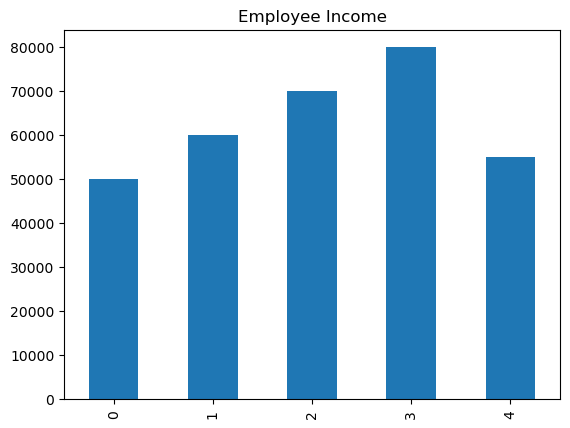

In [86]:
import matplotlib.pyplot as plt

df['Salary'].plot(kind='bar')
plt.title("Employee Income")
plt.show()

##### Pandas Tricks

In [92]:
# Sorting
df.sort_values(by='Salary', ascending=False, inplace=True)
df

In [94]:
# Query Method
df.query('Age > 30 and Salary > 60000')


,Name,Age,Salary,Department,City
2,Charlie,35,70000,IT,Paris
3,David,40,80000,Marketing,Berlin


In [101]:
import pandas as pd

data = {
    'Department': ['HR', 'Finance', 'HR', 'IT', 'Finance', 'IT', 'HR'],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Bangalore', 'Delhi', 'Bangalore', 'Mumbai'],
    'Salary': [50000, 60000, 52000, 70000, 65000, 72000, 51000],
    'Experience': [2, 5, 3, 7, 4, 6, 1]
}

df = pd.DataFrame(data)
print(df)


# Pivot Tables: A pivot table is a summary table that helps you aggregate, group, and analyze your data — similar to Excel’s Pivot Table.
pd.pivot_table(df, values='Salary', index='Department', aggfunc='mean')

# Pivot with Multiple Indexes
pd.pivot_table(df, index='Department', values=['Salary', 'Experience'], aggfunc='mean')

# Pivot with Multiple Values
pd.pivot_table(df, index='Department', values=['Salary', 'Experience'], aggfunc='mean')


  Department       City  Salary  Experience
0         HR      Delhi   50000           2
1    Finance     Mumbai   60000           5
2         HR      Delhi   52000           3
3         IT  Bangalore   70000           7
4    Finance      Delhi   65000           4
5         IT  Bangalore   72000           6
6         HR     Mumbai   51000           1


,Experience,Salary
Department,,
Finance,4.5,62500
HR,2.0,51000
IT,6.5,71000


##### Exporting Data

In [ ]:
df.to_csv('clean_data.csv', index=False)
df.to_excel('clean_data.xlsx', index=False)
